In [2]:
from astropy.io import fits
from astropy import units as u

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from specutils.wcs import specwcs
from specutils import Spectrum1D

In [3]:
iso = pd.read_csv('data/feh200age12.iso',delim_whitespace=True,skiprows=13)

In [4]:
gaia_iso = pd.read_csv('data/fehm20age12gyr_gaiaband.txt',delim_whitespace=True,skiprows=7)

In [5]:
gaia_iso.columns

Index([u'Zini', u'Age', u'Mini', u'Mass', u'logL', u'logTe', u'logg', u'label',
       u'McoreTP', u'C_O', u'period0', u'period1', u'pmode', u'Mloss',
       u'tau1m', u'X', u'Y', u'Xc', u'Xn', u'Xo', u'Cexcess', u'Z', u'mbolmag',
       u'Gmag', u'G_BPmag', u'G_RPmag'],
      dtype='object')

In [31]:
gaia = pd.read_csv('data/sgrII-result.csv')
# pmra error pmde error from massari and helmi
# -1.34 0.07 -1.45 0.10

(22, 13)

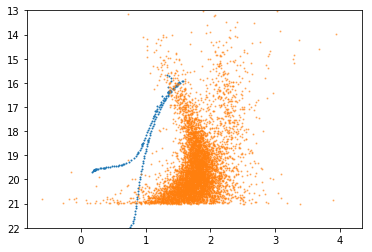

In [48]:
plt.scatter(gaia_iso['G_BPmag'] - gaia_iso['G_RPmag'], gaia_iso['Gmag'] + 19.13,s=1)

plt.scatter(gaia['bp'] - gaia['rp'], gaia['g'],s=1,alpha=0.5)
plt.ylim(22,13)

In [19]:
gaia.columns

Index([u'source_id', u'ra', u'dec', u'pmra', u'pmra_error', u'pmdec',
       u'pmdec_error', u'g', u'bp', u'rp'],
      dtype='object')

In [16]:
np.unique(gaia['pmra_error'])

array([0.0260351 , 0.0286413 , 0.03060997, ...,        nan,        nan,
              nan])

(-10, 0)

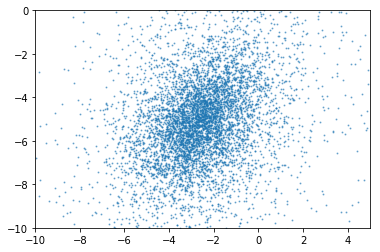

In [42]:
plt.scatter(gaia['pmra'],gaia['pmdec'],s=1,alpha=0.5)
plt.xlim(-10,5)
plt.ylim(-10,0)

In [80]:
phot = pd.read_csv('data/sgrIIphot3_wfu.csv')

In [69]:
phot.columns

Index([u'objID', u'ra', u'dec', u'g', u'g_err', u'i', u'i_err', u'r', u'r_err',
       u'g0', u'i0', u'r0', u'clusterdist'],
      dtype='object')

In [70]:
#photf = phot[phot['clusterdist'] < 0.1]

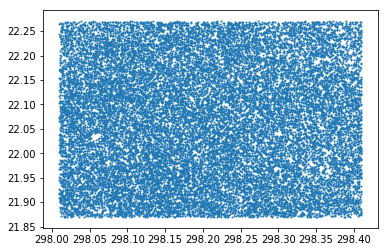

In [71]:
plt.scatter(phot['ra'], phot['dec'],s=1,alpha=1)

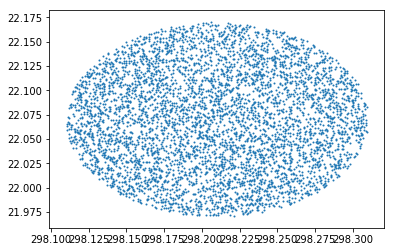

In [72]:
#plt.scatter(photf['ra'], photf['dec'],s=1,alpha=1)

In [73]:
#photf['ra'].size

4882

In [82]:
phot.columns

Index([u'ObjID', u'ra', u'dec', u'gMeanPSFMag', u'gMeanPSFMagErr',
       u'rMeanPSFMag', u'rMeanPSFMagErr', u'iMeanPSFMag', u'iMeanPSFMagErr',
       u'gMeanPSFmagNpt', u'rMeanPSFmagNpt', u'iMeanPSFmagNpt', u'gFlags',
       u'gQfPerfect', u'rFlags', u'rQfPerfect', u'iFlags', u'iQfPerfect'],
      dtype='object')

(23, 14)

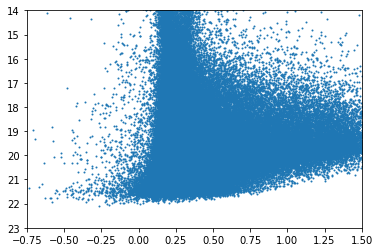

In [83]:
dmod = 19.13

plt.scatter(phot['rMeanPSFMag'] - phot['iMeanPSFMag'], phot['iMeanPSFMag'],s=1,alpha=1)

#plt.scatter(iso['rP1'] - iso['iP1'], iso['iP1'] + dmod,s=1)
plt.xlim(-0.75,1.5)
plt.ylim(23,14)

(23, 15)

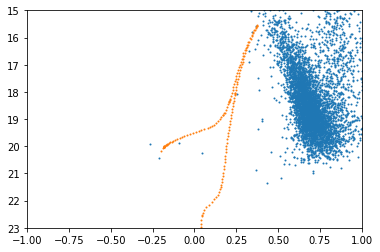

In [61]:
dmod = 19.13

plt.scatter(photf['r0'] - photf['i0'], photf['i0'],s=1,alpha=1)

plt.scatter(iso['rP1'] - iso['iP1'], iso['iP1'] + dmod,s=1)
plt.xlim(-1,1)
plt.ylim(23,15)

# Cleaning up the photometry/de-reddening. Shouldn't need to run this more than once

In [43]:
ebv = 0.097

phot['g0'] = phot['g'] - ebv*3.384
phot['i0'] = phot['i'] - ebv*2.483
phot['r0'] = phot['r'] - ebv*1.838

In [44]:
def distance(x1,y1,x2,y2): #this is distance on cartesian thing
    d = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    return d

In [45]:
clusterdist = []

for i in range(phot['ra'].size):
    dist = distance(298.21, 22.07, phot['ra'][i],phot['dec'][i])
    clusterdist.append(dist)
    
clusterdist = np.array(clusterdist)
phot['clusterdist'] = clusterdist

phot.to_csv('data/sgrIIphot.csv',index=False)

In [46]:
phot

,objID,ra,dec,g,g_err,i,i_err,r,r_err,g0,i0,r0,clusterdist
0,134242980156315247,298.015627,21.870576,19.043100,0.007595,17.193600,0.002996,17.866800,0.004391,18.714852,16.952749,17.688514,0.278480
1,134242980160326214,298.016027,21.871404,19.509300,0.009293,17.528400,0.005483,18.236700,0.004342,19.181052,17.287549,18.058414,0.277607
2,134242980210449283,298.021039,21.873973,21.050400,0.015798,19.045601,0.012646,19.733000,0.009046,20.722152,18.804750,19.554714,0.272273
3,134242980221828463,298.022168,21.873264,17.552401,0.000848,16.129700,0.003312,16.622200,0.003273,17.224153,15.888849,16.443914,0.272004
4,134242980344318019,298.034585,21.872955,21.660500,0.044005,19.863100,0.026708,20.558599,0.016764,21.332252,19.622249,20.380313,0.263812
5,134242980394008925,298.039344,21.873666,20.670200,0.014502,18.809401,0.013767,19.479200,0.011982,20.341952,18.568550,19.300914,0.260136
6,134242980504059899,298.050378,21.874446,21.046101,0.043910,18.985300,0.014866,19.687599,0.014211,20.717853,18.744449,19.509313,0.252430
7,134242980574809865,298.057437,21.874411,20.191200,0.024241,18.541201,0.005631,19.097700,0.006639,19.862952,18.300350,18.919414,0.248053
8,134242980632204834,298.063206,21.870237,18.699100,0.005367,17.490999,0.009104,17.928900,0.002619,18.370852,17.250148,17.750614,0.247898
9,134242980651655016,298.065136,21.870363,22.260201,0.194795,20.196100,0.052934,20.917999,0.024075,21.931953,19.955249,20.739713,0.246658
